In [1]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# import numpy as np

# # Sample text data
# corpus = [
#     "I enjoy deep learning.",
#     "Deep learning is fascinating.",
#     "Deep learning has applications in many fields.",
#     "I want to learn more about deep learning.",
# ]

# # Tokenize the text data
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(corpus)
# total_words = len(tokenizer.word_index) + 1  # Add 1 for the out-of-vocabulary (OOV) token

# # Create input sequences and labels for training
# input_sequences = []
# for line in corpus:
#     token_list = tokenizer.texts_to_sequences([line])[0]
#     for i in range(1, len(token_list)):
#         n_gram_sequence = token_list[:i + 1]
#         input_sequences.append(n_gram_sequence)
        
# # Pad sequences to have the same length
# max_sequence_length = max(len(seq) for seq in input_sequences)
# input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')


# print(input_sequences[:,-1])
# # Create predictors and labels
# X = input_sequences[:, :-1]
# y = input_sequences[:, -1]

# # Convert labels to one-hot encoding
# y = tf.keras.utils.to_categorical(y, num_classes=total_words)
# print(y)
# # # Build an LSTM model
# # model = tf.keras.Sequential([
# #     tf.keras.layers.Embedding(total_words, 100, input_length=max_sequence_length - 1),
# #     tf.keras.layers.LSTM(150),
# #     tf.keras.layers.Dense(total_words, activation='softmax')
# # ])

# # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# # model.fit(X, y, epochs=100, verbose=1)

# # # Function to predict the next word
# # def predict_next_word(seed_text, next_words):
# #     for _ in range(next_words):
# #         token_list = tokenizer.texts_to_sequences([seed_text])[0]
# #         token_list = pad_sequences([token_list], maxlen=max_sequence_length - 1, padding='pre')
# #         predicted = model.predict_classes(token_list, verbose=0)
# #         output_word = ""
# #         for word, index in tokenizer.word_index.items():
# #             if index == predicted:
# #                 output_word = word
# #                 break
# #         seed_text += " " + output_word
# #     return seed_text

# # # Generate text
# # generated_text = predict_next_word("I enjoy", next_words=5)
# # print(generated_text)


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM , Embedding , Dense
from keras.regularizers import L2
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\MAhesh\FERGUSSON\SEM 3\DEEP LEARNING\Datasets\stories (Text Sequence).csv")

In [3]:
df.head(5)

,Unnamed: 0,story
0,0,All in due time.\n\nWhen our plane landed and ...
1,1,Millionaire.\n\nWhen my checking account regis...
2,2,"LIVE ON THE SCENE!\n\n""Thats right, Kelly, if ..."
3,3,The New Kid\n\nThere was something off about t...
4,4,Seven\n\nSeven. \n\nHow can such a boring numb...


In [4]:
df.drop("Unnamed: 0",axis = 1,inplace = True)

In [5]:
def remove(i):
    i = re.sub("\n"," ",i)
    i = re.sub(r'[^\w\s]',"",i)
    return i

def to_lower(i):
    i = i.lower()
    return i

df['story'] = df['story'].apply(remove)
df['story'] = df['story'].apply(to_lower)

# Tokenizing and Preprocessing

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['story'])

In [7]:
sequences = tokenizer.texts_to_sequences(df['story'])

# Creating input and labels

We will create n-grams from 1 to 5

In [8]:
inputs = []
outputs = []
for sequence in sequences :
    for i in range(1,len(sequence)):
        if i <= 5 :
            inputs.append(sequence[:i])
            outputs.append(sequence[i])
        else :
            inputs.append(sequence[i-5:i])
            outputs.append(sequence[i])


In [9]:
for i in range(10) :
     print("INPUT : ",inputs[i],"\n OUTPUT : ",outputs[i])

INPUT :  [52] 
 OUTPUT :  8
INPUT :  [52, 8] 
 OUTPUT :  316
INPUT :  [52, 8, 316] 
 OUTPUT :  73
INPUT :  [52, 8, 316, 73] 
 OUTPUT :  43
INPUT :  [52, 8, 316, 73, 43] 
 OUTPUT :  45
INPUT :  [8, 316, 73, 43, 45] 
 OUTPUT :  317
INPUT :  [316, 73, 43, 45, 317] 
 OUTPUT :  737
INPUT :  [73, 43, 45, 317, 737] 
 OUTPUT :  3
INPUT :  [43, 45, 317, 737, 3] 
 OUTPUT :  2
INPUT :  [45, 317, 737, 3, 2] 
 OUTPUT :  738


Padding Sequences to have same length

In [10]:
inputs = pad_sequences(inputs , maxlen=5 , padding='pre')

Creating X and y

In [11]:
X = inputs

In [12]:
y = tf.keras.utils.to_categorical(outputs , num_classes = len(tokenizer.word_index) + 1 )

In [13]:
for i in range(10) :
     print("INPUT : ",X[i],"\n OUTPUT : ",y[i])

INPUT :  [ 0  0  0  0 52] 
 OUTPUT :  [0. 0. 0. ... 0. 0. 0.]
INPUT :  [ 0  0  0 52  8] 
 OUTPUT :  [0. 0. 0. ... 0. 0. 0.]
INPUT :  [  0   0  52   8 316] 
 OUTPUT :  [0. 0. 0. ... 0. 0. 0.]
INPUT :  [  0  52   8 316  73] 
 OUTPUT :  [0. 0. 0. ... 0. 0. 0.]
INPUT :  [ 52   8 316  73  43] 
 OUTPUT :  [0. 0. 0. ... 0. 0. 0.]
INPUT :  [  8 316  73  43  45] 
 OUTPUT :  [0. 0. 0. ... 0. 0. 0.]
INPUT :  [316  73  43  45 317] 
 OUTPUT :  [0. 0. 0. ... 0. 0. 0.]
INPUT :  [ 73  43  45 317 737] 
 OUTPUT :  [0. 0. 0. ... 0. 0. 0.]
INPUT :  [ 43  45 317 737   3] 
 OUTPUT :  [0. 0. 1. ... 0. 0. 0.]
INPUT :  [ 45 317 737   3   2] 
 OUTPUT :  [0. 0. 0. ... 0. 0. 0.]


In [14]:
# y = pd.DataFrame(outputs)
# y = pd.get_dummies(y , columns=['Outputs'])
# y.head()
# another option

In [15]:
total_words = len(tokenizer.word_index)+1
total_words

2964

# LSTM model

Epoch 1/20
13/13 [==============================] - 12s 43ms/step - loss: 8.0632 - accuracy: 0.0200
Epoch 2/20
13/13 [==============================] - 0s 29ms/step - loss: 8.0412 - accuracy: 0.0329
Epoch 3/20
13/13 [==============================] - 0s 29ms/step - loss: 8.0148 - accuracy: 0.0315
Epoch 4/20
13/13 [==============================] - 0s 31ms/step - loss: 7.9784 - accuracy: 0.0310
Epoch 5/20
13/13 [==============================] - 0s 31ms/step - loss: 7.9219 - accuracy: 0.0310
Epoch 6/20
13/13 [==============================] - 0s 32ms/step - loss: 7.8253 - accuracy: 0.0310
Epoch 7/20
13/13 [==============================] - 0s 30ms/step - loss: 7.6608 - accuracy: 0.0310
Epoch 8/20
13/13 [==============================] - 0s 31ms/step - loss: 7.4327 - accuracy: 0.0310
Epoch 9/20
13/13 [==============================] - 0s 31ms/step - loss: 7.2019 - accuracy: 0.0310
Epoch 10/20
13/13 [==============================] - 0s 30ms/step - loss: 7.0167 - accuracy: 0.0310
Epoch 11

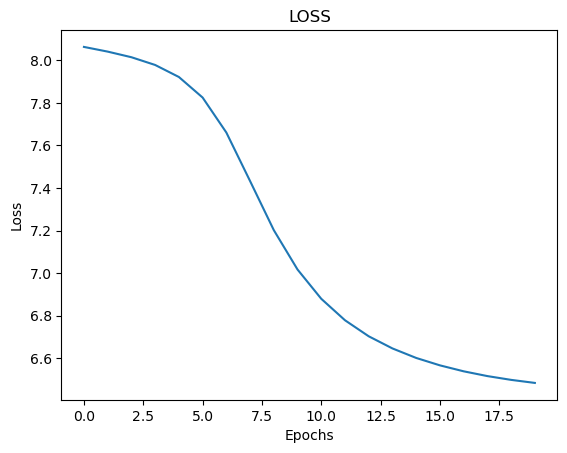

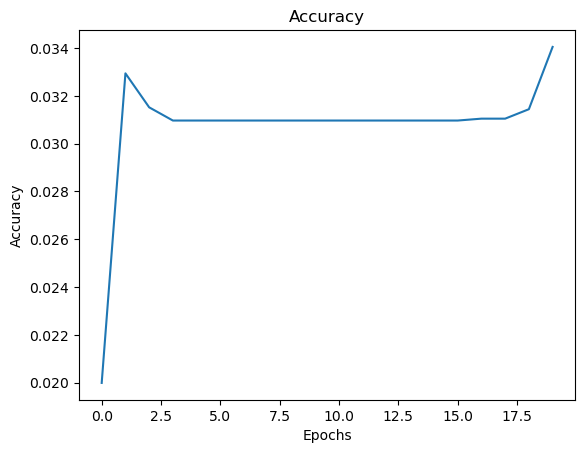

In [16]:
model_1 = Sequential ()
model_1.add(Embedding(total_words , 10 ))
model_1.add(LSTM(10 , activation='tanh' , kernel_regularizer= L2(0.005) ))
model_1.add(Dense(total_words, activation='softmax'))


model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


history = model_1.fit(X , y , epochs=20 , verbose=1 ,batch_size = 1000)


plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LOSS")
plt.show()


plt.plot(history.history['accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.show()


# Predictions 

In [108]:
text = "line hearing screams in the airport and as i looked over"

In [109]:
text = [text]

In [110]:
sequence = tokenizer.texts_to_sequences(text)
sequence

[[196, 756, 320, 8, 1, 318, 3, 14, 2, 95, 69]]

In [111]:
sequence = pad_sequences(sequence ,maxlen = 5 , padding='pre')
sequence

array([[ 3, 14,  2, 95, 69]])

In [112]:
y_pred = model_1.predict(sequence)

1/1 [==============================] - 0s 32ms/step


In [113]:
y_pred = y_pred[0]
y_pred

array([3.2680004e-05, 2.2394864e-02, 2.3624906e-02, ..., 5.9517319e-05,
       7.5514734e-05, 9.8785022e-05], dtype=float32)

In [114]:
index = np.where(y_pred == min(y_pred))
index = index[0][0]
index

2467

In [115]:
y_pred[index]

2.6756932e-05

In [116]:
for key, value in tokenizer.word_index.items():
    if value == index:
        found_key = key
        break  

In [117]:
found_key

'gravity'

In [118]:
text[0] + " " + found_key

'line hearing screams in the airport and as i looked over gravity'

In [119]:
def prediction(text , next_words):
    for next_word in range(next_words):
        text = [text]
        sequence = tokenizer.texts_to_sequences(text)
        sequence = pad_sequences(sequence ,maxlen = 5 , padding='pre')
        y_pred = model_1.predict(sequence)
        y_pred = y_pred[0]
        index = np.where(y_pred == max(y_pred))
        index = index[0][0]
        for key, value in tokenizer.word_index.items():
            if value == index:
                found_key = key
                break  
        text = text[0] + " " + found_key
        print(text)


In [121]:
prediction("screams in the airport and as i looked" , 10)

1/1 [==============================] - 0s 21ms/step
screams in the airport and as i looked i
1/1 [==============================] - 0s 36ms/step
screams in the airport and as i looked i i
1/1 [==============================] - 0s 4ms/step
screams in the airport and as i looked i i i
1/1 [==============================] - 0s 16ms/step
screams in the airport and as i looked i i i i
1/1 [==============================] - 0s 18ms/step
screams in the airport and as i looked i i i i i
1/1 [==============================] - 0s 16ms/step
screams in the airport and as i looked i i i i i i
1/1 [==============================] - 0s 43ms/step
screams in the airport and as i looked i i i i i i i
1/1 [==============================] - 0s 28ms/step
screams in the airport and as i looked i i i i i i i i
1/1 [==============================] - 0s 20ms/step
screams in the airport and as i looked i i i i i i i i i
1/1 [==============================] - 0s 16ms/step
screams in the airport and as i looked i